### 1. Collecting the data

In [1]:
import pandas as pd

df = pd.read_csv('heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


### 2. Data Cleaning

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [3]:
df = df.dropna()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 846 entries, 0 to 905
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       846 non-null    int64  
 1   sex       846 non-null    object 
 2   cp        846 non-null    object 
 3   trestbps  846 non-null    int64  
 4   chol      846 non-null    int64  
 5   fbs       846 non-null    bool   
 6   restecg   846 non-null    object 
 7   thalch    846 non-null    int64  
 8   exang     846 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     846 non-null    object 
 11  thal      846 non-null    object 
 12  num       846 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.7+ KB


In [5]:
df['exang'] = df['exang'].astype('bool')

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,True,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,True,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,True,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,True,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [7]:
df['chol'].value_counts()

chol
0      157
220      9
219      9
230      9
254      9
      ... 
85       1
129      1
360      1
312      1
109      1
Name: count, Length: 219, dtype: int64

In [8]:
df['num'].value_counts()

num
0    378
1    250
2    101
3     91
4     26
Name: count, dtype: int64

In [9]:
df_num = df.select_dtypes(include = ['int64', 'float64'])
df_num.head()

,age,trestbps,chol,thalch,oldpeak,num
0,63,145,233,150,2.3,0
1,41,135,203,132,0.0,0
2,57,140,192,148,0.4,0
3,52,118,186,190,0.0,0
4,57,110,201,126,1.5,0


In [10]:
df_cat = df.select_dtypes(include = ['object', 'bool'])
df_cat.head()

,sex,cp,fbs,restecg,exang,slope,thal
0,Male,typical angina,True,lv hypertrophy,True,downsloping,fixed defect
1,Male,atypical angina,False,normal,True,flat,fixed defect
2,Male,asymptomatic,False,normal,True,flat,fixed defect
3,Male,typical angina,False,lv hypertrophy,True,flat,fixed defect
4,Male,asymptomatic,False,normal,True,flat,fixed defect


In [11]:
age_groups = {
    "20-29": lambda age: 20 <= age <= 29,
    "30-39": lambda age: 30 <= age <= 39,
    "40-49": lambda age: 40 <= age <= 49,
    "50-59": lambda age: 50 <= age <= 59,
    "60+": lambda age: age >= 60
}

# Create a new column named 'age_group' based on age
df['age_group'] = df['age'].apply(lambda x: [group for group, condition in age_groups.items() if condition(x)][0])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num,age_group
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,True,2.3,downsloping,fixed defect,0,60+
1,41,Male,atypical angina,135,203,False,normal,132,True,0.0,flat,fixed defect,0,40-49
2,57,Male,asymptomatic,140,192,False,normal,148,True,0.4,flat,fixed defect,0,50-59
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,True,0.0,flat,fixed defect,0,50-59
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0,50-59


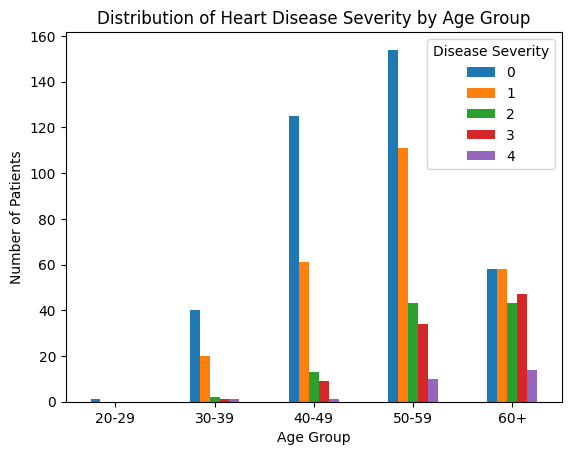

In [12]:
import matplotlib.pyplot as plt

grouped_data = df.groupby('age_group')['num'].value_counts().unstack(fill_value=0)

# Create a bar graph
grouped_data.plot(kind='bar', stacked=False, legend = '')  # Set stacked=False for separate bars

plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.title('Distribution of Heart Disease Severity by Age Group')
plt.legend(title='Disease Severity')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Display the plot
plt.show()

We can observe that for the age group of (40-49) and (50-59) people have the chance of getting heart disease from the given data.

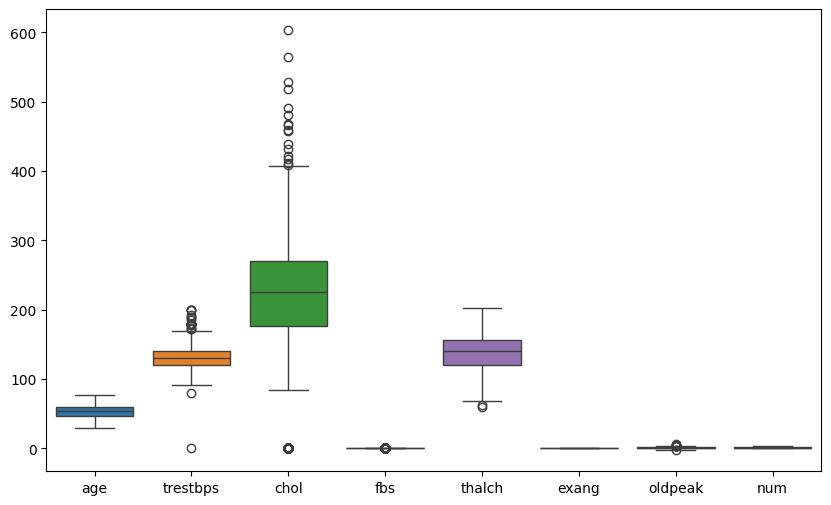

In [13]:
# Boxplot of numerical variables
import seaborn as sns

plt.figure(figsize = (10, 6))
sns.boxplot(data = df)
plt.show()

Outliers present in the 'chol', 'trestbps', 'thalch' columns from the above boxplot.

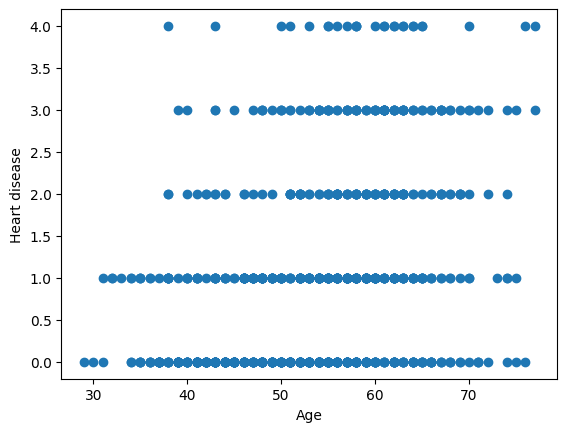

In [14]:
plt.scatter(x = df['age'], y = df['num'])
plt.xlabel('Age')
plt.ylabel('Heart disease')
plt.show()

<Figure size 1200x800 with 0 Axes>

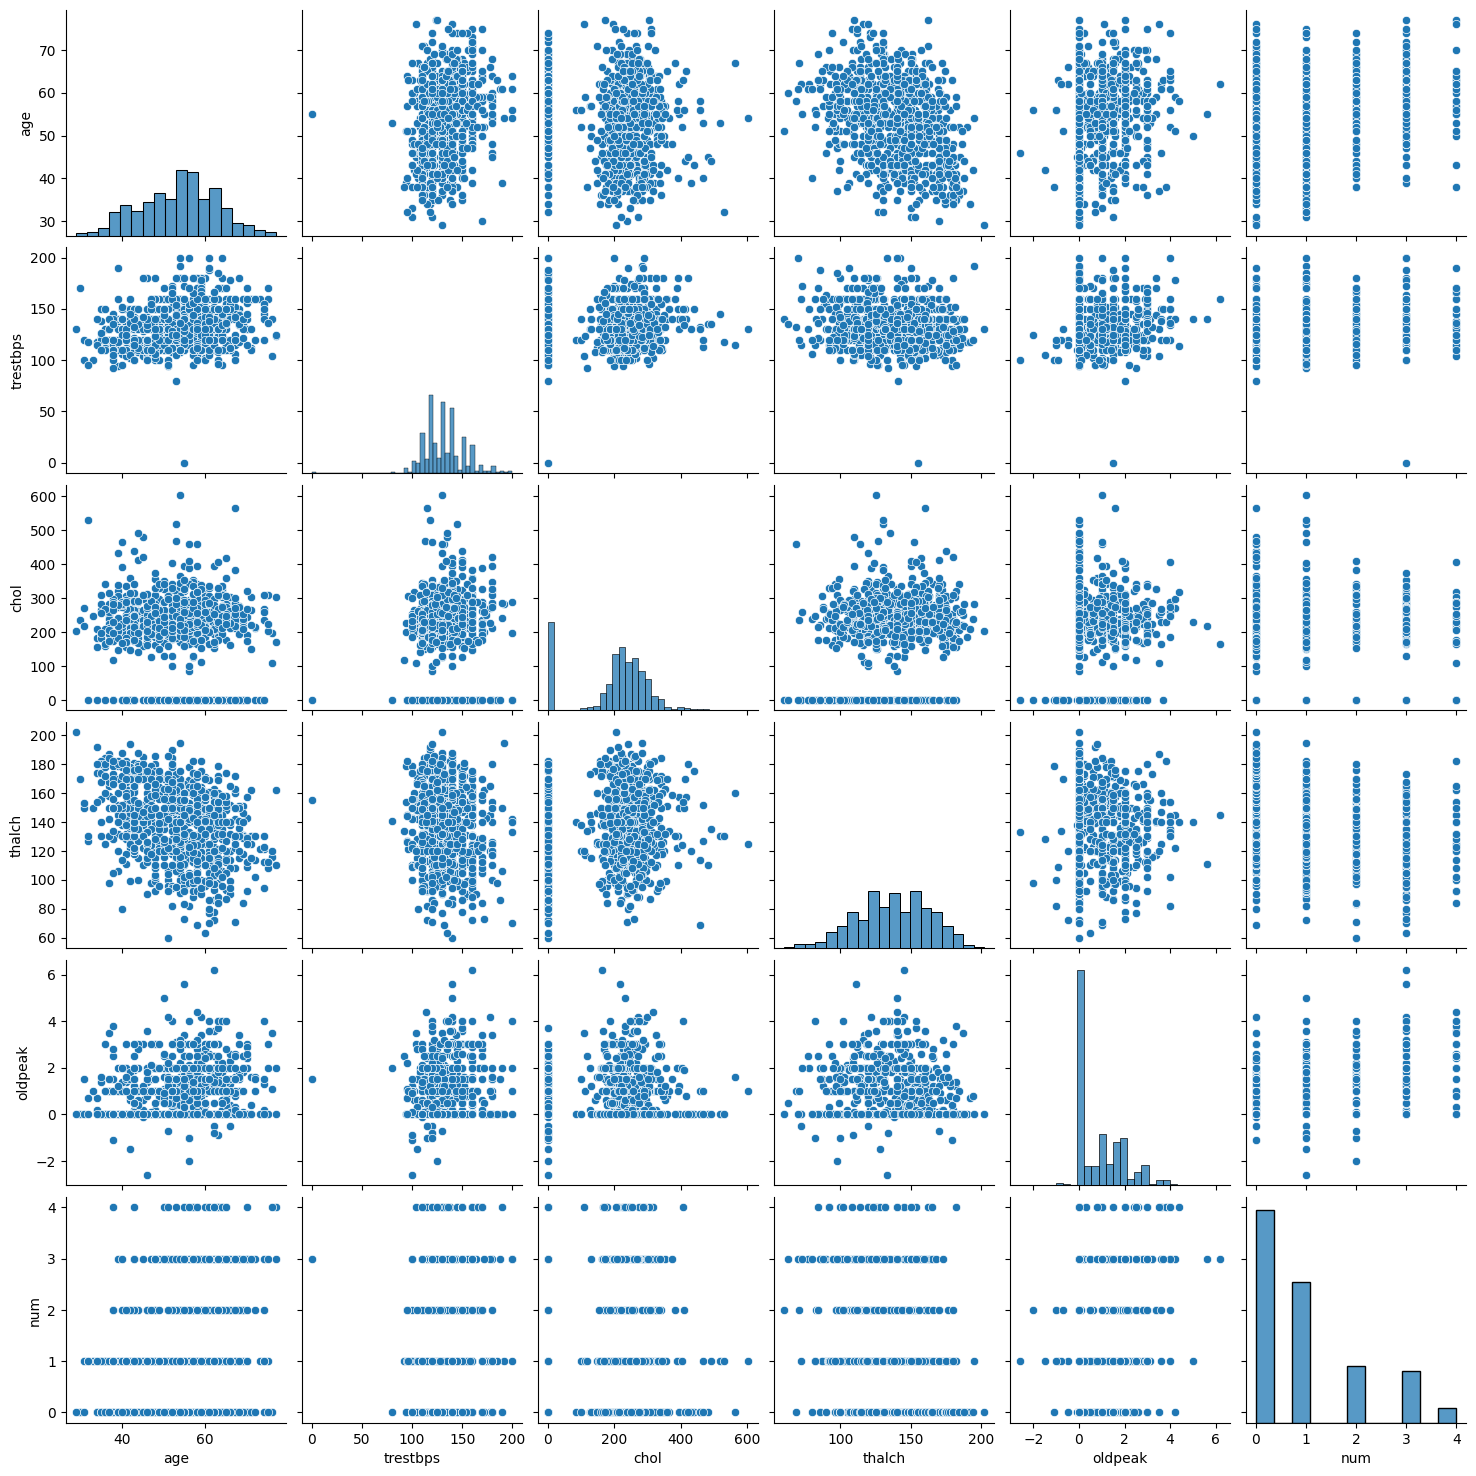

In [15]:
# Pair plot of numerical variables
plt.figure(figsize = (12, 8))
sns.pairplot(df_num)
plt.show()

age : -0.10610774429980914
trestbps : 0.23885642092471676
chol : -0.5673377720910706
thalch : -0.19578559914048066
oldpeak : 1.0217090718797424
num : 1.0045121987495698


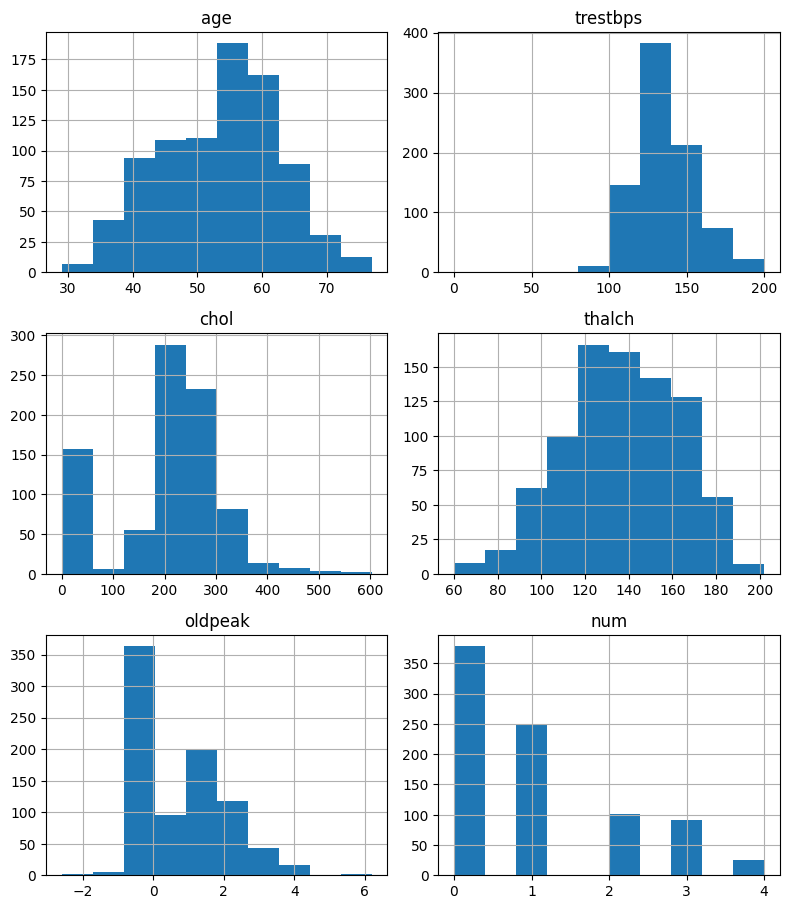

In [16]:
plt.figure(figsize=(8, 18))

for col in df_num.columns:
    plt.subplot(len(df_num.columns), 2, df_num.columns.get_loc(col) + 1) 
    df_num[col].hist()  
    plt.title(col)  
    print(col, ':' , df_num[col].skew())

plt.tight_layout()  # Adjust spacing between subplots

# Display the plot
plt.show()

In [17]:
# Imputing the outliers with Median value

import numpy as np # type: ignore

def replace_outliers_with_median(df):
  """
  Replaces outliers in each column of a DataFrame with the median of that column,
  excluding the outliers themselves.

  Args:
    df: A pandas DataFrame.

  Returns:
    A new pandas DataFrame with outliers replaced by median values.
  """
  new_df = df.copy()

  # Iterate over numeric columns
  for col in new_df.select_dtypes(include=[np.number]):
    # Define IQR outlier threshold function (adjust multiplier as needed)
    def is_outlier(series):
      q1 = series.quantile(0.25)
      q3 = series.quantile(0.75)
      iqr = q3 - q1
      lower_bound = q1 - (1.5 * iqr)
      upper_bound = q3 + (1.5 * iqr)
      return ~((series >= lower_bound) & (series <= upper_bound))

    # Find outliers (boolean Series)
    outliers = is_outlier(new_df[col])
    
    # Replace outliers with median (excluding outliers in median calculation)
    median_val = new_df.loc[~outliers, col].median()
    new_df.loc[outliers, col] = median_val

  return new_df

X = replace_outliers_with_median(df_num)
print(X)

     age  trestbps  chol  thalch  oldpeak  num
0     63       145   233     150      2.3    0
1     41       135   203     132      0.0    0
2     57       140   192     148      0.4    0
3     52       118   186     190      0.0    0
4     57       110   201     126      1.5    0
..   ...       ...   ...     ...      ...  ...
901   51       110   239      92      0.0    4
902   62       160   254     108      3.0    4
903   53       125   239     120      1.5    4
904   62       166   170     120      3.0    4
905   56       170   239     123      2.5    4

[846 rows x 6 columns]


In [18]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak      0
slope        0
thal         0
num          0
age_group    0
dtype: int64

In [19]:
correlation = df_num.corr()

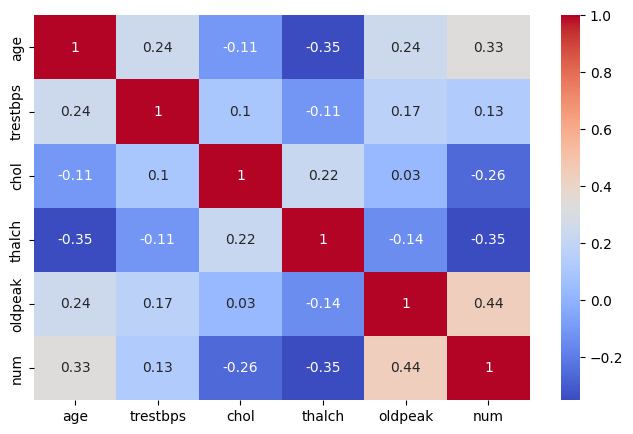

In [20]:
plt.figure(figsize = (8, 5))
sns.heatmap(data = correlation, annot = True, cmap = 'coolwarm')
plt.show()

Hence there are no such X variables which has high correlation between each other.

### 3. Data Transformation

In [21]:
# Standardization
df_cont = df_num.drop(df_num[['num']], axis = 1)
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

for i in df_cont.columns:
    df_cont[i] = ss.fit_transform(df_cont[[i]])
df_cont.head()

,age,trestbps,chol,thalch,oldpeak
0,1.052849,0.652591,0.271960,0.501387,1.288612
1,-1.366364,0.132633,0.003114,-0.201922,-0.815249
2,0.393064,0.392612,-0.095463,0.423242,-0.449360
3,-0.156758,-0.751298,-0.149232,2.064297,-0.815249
4,0.393064,-1.167265,-0.014809,-0.436358,0.556834


In [22]:
# Label Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in df_cat.columns:
    df_cat[i] = le.fit_transform(df_cat[[i]])
df_cat.head()

d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Data Science\DS Assignment Solution\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-v

,sex,cp,fbs,restecg,exang,slope,thal
0,1,3,1,0,0,0,0
1,1,1,0,1,0,1,0
2,1,0,0,1,0,1,0
3,1,3,0,0,0,1,0
4,1,0,0,1,0,1,0


### 4. Data Partition

In [23]:
Y = df_num['num']
X = pd.concat([df_cont, df_cat], axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

### 5. Model fitting

In [45]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = 'log_loss')
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='log_loss')

In [46]:
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

# Metrics
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(Y_train, Y_pred_train)
test_accuracy = accuracy_score(Y_test, Y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 1.0
Testing Accuracy: 0.5117647058823529


### 6. Data Validation

In [47]:
# Data Validation

training_acc = []
test_acc = []

for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=i)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test  = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np # type: ignore
print("Cross validation - Training accuracy:" ,np.mean(training_acc).round(3))
print("Cross validation - Test accuracy:" ,np.mean(test_acc).round(3))

Cross validation - Training accuracy: 1.0
Cross validation - Test accuracy: 0.478


In [27]:
# Count the number of nodes in the tree
node_count = model.tree_.node_count

# Count the depth of the tree
max_depth = model.tree_.max_depth

print("Number of nodes:", node_count)
print("Depth of tree:", max_depth)

Number of nodes: 447
Depth of tree: 15


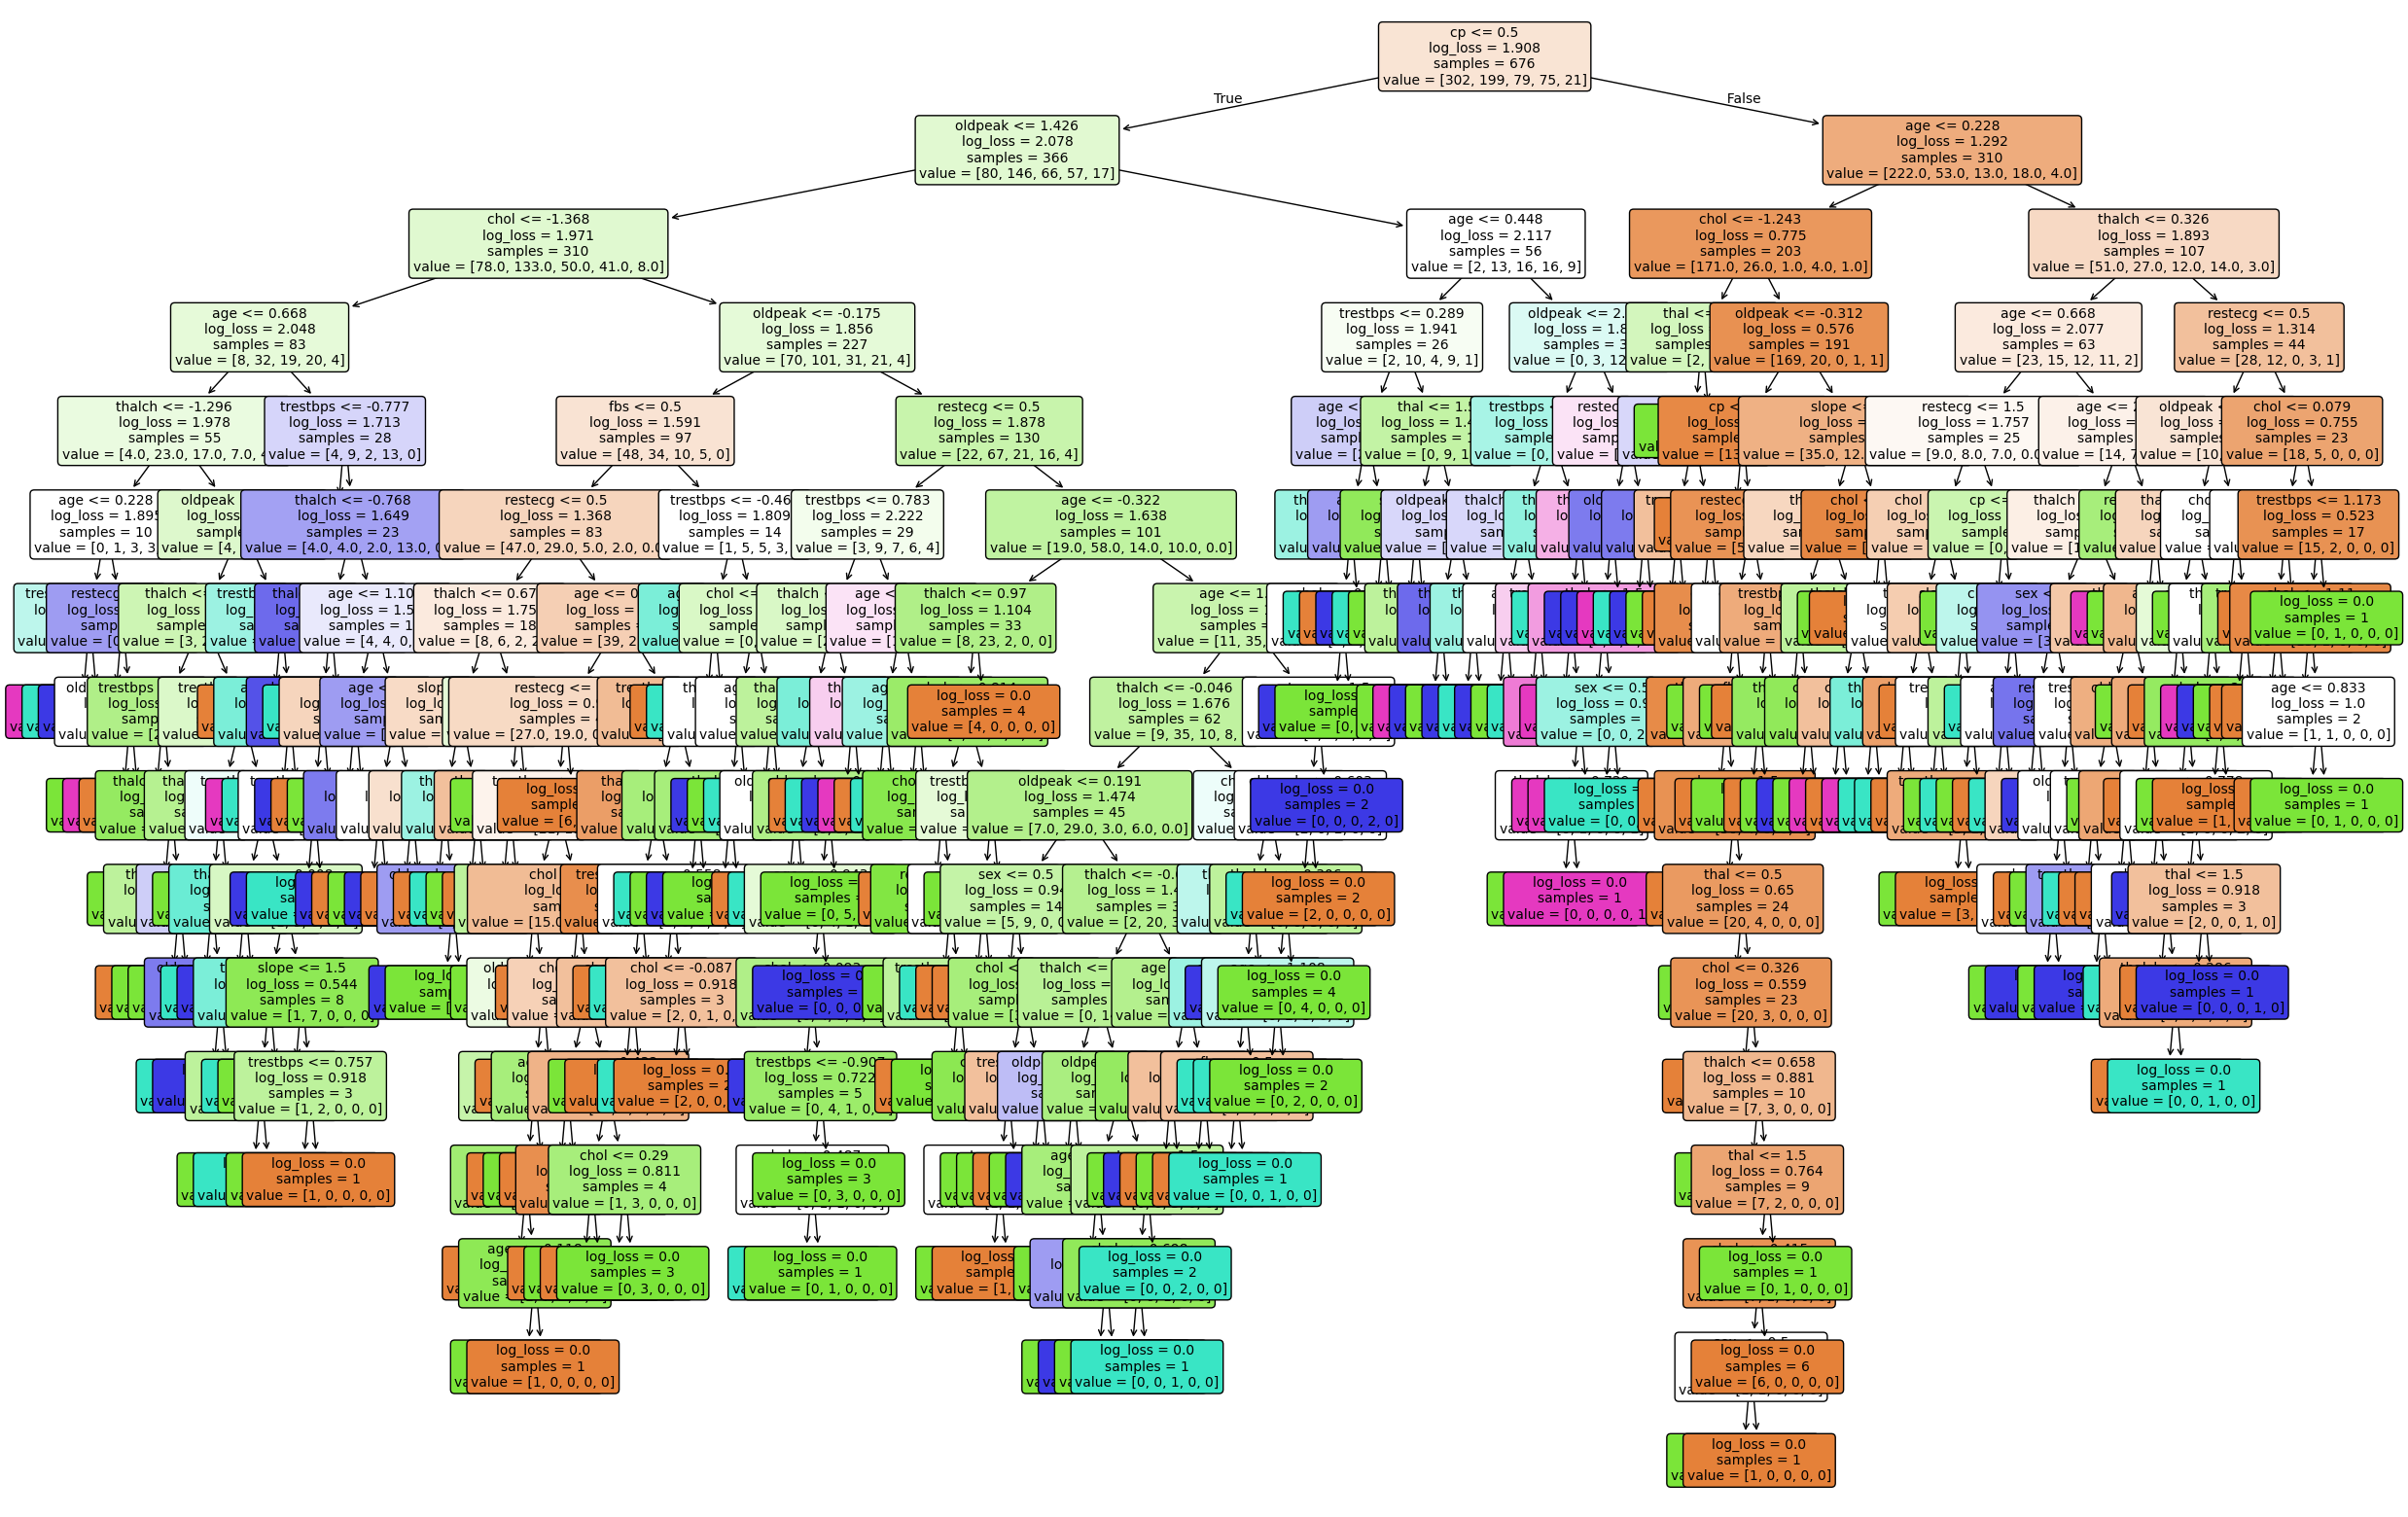

In [28]:
import matplotlib.pyplot as plt # type: ignore
from sklearn import tree        # type: ignore

plt.figure(figsize=(30,20))

tree.plot_tree(model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.show()

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train, Y_pred_train)
cm

array([[302,   0,   0,   0,   0],
       [  0, 199,   0,   0,   0],
       [  0,   0,  79,   0,   0],
       [  0,   0,   0,  75,   0],
       [  0,   0,   0,   0,  21]], dtype=int64)

In [30]:
cm = confusion_matrix(Y_test, Y_pred_test)
cm

array([[55, 19,  1,  0,  1],
       [16, 20, 11,  3,  1],
       [ 3, 10,  4,  4,  1],
       [ 3,  6,  3,  2,  2],
       [ 0,  4,  1,  0,  0]], dtype=int64)

In [62]:
# Ensemble Methods: 
# 1. Bagging Classifier

from sklearn.ensemble import BaggingClassifier # type: ignore
model = DecisionTreeClassifier(criterion='log_loss', max_depth=11)
bagging = BaggingClassifier(estimator=model, n_estimators=200, max_samples=0.8, max_features=0.8, random_state=42)
bagging.fit(X_train, Y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(criterion='log_loss',
                                                   max_depth=11),
                  max_features=0.8, max_samples=0.8, n_estimators=200,
                  random_state=42)

In [63]:
Y_pred_train = bagging.predict(X_train)
Y_pred_test = bagging.predict(X_test)

# Metrics
from sklearn.metrics import accuracy_score # type: ignore
train_accuracy = accuracy_score(Y_train, Y_pred_train)
test_accuracy = accuracy_score(Y_test, Y_pred_test)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9985207100591716
Testing Accuracy: 0.6058823529411764


In [75]:
# Ensemble Methods: 2. Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier # type: ignore
RF = RandomForestClassifier(n_estimators=500, criterion='log_loss', max_samples=0.8, max_features=0.8, random_state=42, max_depth=12)
RF.fit(X_train, Y_train)

RandomForestClassifier(criterion='log_loss', max_depth=12, max_features=0.8,
                       max_samples=0.8, n_estimators=500, random_state=42)

In [76]:
Y_pred_train = RF.predict(X_train)
Y_pred_test = RF.predict(X_test)

# Metrics
from sklearn.metrics import accuracy_score # type: ignore
train_accuracy = accuracy_score(Y_train, Y_pred_train)
test_accuracy = accuracy_score(Y_test, Y_pred_test)

print("RF - Training Accuracy:", train_accuracy)
print("RF - Testing Accuracy:", test_accuracy)

RF - Training Accuracy: 1.0
RF - Testing Accuracy: 0.5882352941176471


##### GridSearchCV algorithm for RandomForestClassifier

In [77]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_samples': [0.6, 0.7, 0.8],
    'max_features': [0.6, 0.7, 0.8]
}

RF = RandomForestClassifier(criterion='log_loss')
grid_search = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5, scoring = 'accuracy')

grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Y_pred_train = best_model.predict(X_train)
Y_pred_test = best_model.predict(X_test)

best_params = grid_search.best_params_
print("Best Hyperparameters:")
print(best_params)

# Compute Accuracy score for training set
train_acc = round((accuracy_score(Y_train, Y_pred_train)), 3)
print(f"Training accuracy: {train_acc:.3f}")

# Compute Accracy score for testing set
test_acc = (accuracy_score(Y_test, Y_pred_test))
print(f"Testing accuracy: {test_acc:.3f}")


Best Hyperparameters:
{'max_features': 0.8, 'max_samples': 0.7, 'n_estimators': 300}
Training accuracy: 1.000
Testing accuracy: 0.582


In [36]:
#=========================================================
# cross validation with Bagging Classifier
#=========================================================
from sklearn.ensemble import BaggingClassifier

training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.20,random_state=i)
    model = BaggingClassifier(max_samples=0.8,max_features=0.8, n_estimators=100)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test  = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validation - Training accuracy:" ,np.mean(training_acc).round(2))
print("Cross validation - Test accuracy:" ,np.mean(test_acc).round(2))

Cross validation - Training accuracy: 1.0
Cross validation - Test accuracy: 0.57


In [37]:
#=========================================================
# cross validation with randomforest classifier
#=========================================================
from sklearn.ensemble import RandomForestClassifier

training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.20,random_state=i)
    model = RandomForestClassifier(max_samples=0.8,max_features=0.7)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test  = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validation - Training accuracy:" ,np.mean(training_acc).round(2))
print("Cross validation - Test accuracy:" ,np.mean(test_acc).round(2))

Cross validation - Training accuracy: 1.0
Cross validation - Test accuracy: 0.56


In [38]:
#=========================================================
# cross validation with GradientBoosting Classifier
#=========================================================
from sklearn.ensemble import GradientBoostingClassifier

training_acc = []
test_acc = []

for i in range(1,101):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.20,random_state=i)
    model = GradientBoostingClassifier(learning_rate=0.1,n_estimators=200,max_features=0.7)
    model.fit(X_train,Y_train)
    Y_pred_train = model.predict(X_train)
    Y_pred_test  = model.predict(X_test)
    training_acc.append(accuracy_score(Y_train,Y_pred_train))
    test_acc.append(accuracy_score(Y_test,Y_pred_test))

import numpy as np
print("Cross validation - Training accuracy:" ,np.mean(training_acc).round(2))
print("Cross validation - Test accuracy:" ,np.mean(test_acc).round(2))

Cross validation - Training accuracy: 0.99
Cross validation - Test accuracy: 0.55


Although removing the outliers, there is no significant increase in the Test data accuracy.

After appyling various ensemble methods, which are used to overcome overfitting stage where there is no sign of increase of the test accuracy.

The better performance is exhibited by the Bagging regressor where training accuracy is 99.85% and testing accuracy is 60.58%.

#### Interview Questions

1. What are some hyperparameters of decision tree models, how do they affect the model's performance?

        The hyperparameters present in the decision tree are: 

1. Criterion in which we have three types of parameters. They are 'gini', 'entropy' and 'log_loss' in which each have their respective advantages. 
2. Max_depth indicates the maximum depth of the tree that is to be considered by the model. 
3. Max_features indicates the maximum number of X varaibles has to included from the original dataset. It is generally indicates the percentage of X variables should be considered.

2. What is the difference between Label Encoding and One-hot Encoding?

Label Encoding assigns a numerical lable to each category in a categorical variable, whereas One-hot Encoding creates a new binary column for each category. Each column represents a category and contains either 0 or 1. It increases the dimensionality of the dataset.